# Notebook ICD - 9

Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

### Diabetes Dataset - Pima Indians

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [2]:
df = pd.read_csv("diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50     yes  
1                     0.351   31      no  
2                     0.672   32     yes  
3                     0.167   21      no  
4                     2.288   33     yes  


sns.pairplot(df, hue="Outcome")

In [3]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [4]:
# if necessary
replace_dict = {'yes': '1', 'no': '0'}
y2 = y.replace(replace_dict)

In [5]:
df2 = df.replace(replace_dict)
print(df2.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.672   32       1  
3                     0.167   21       0  
4                     2.288   33       1  


## Filter methods

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection

### InfoGain

Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

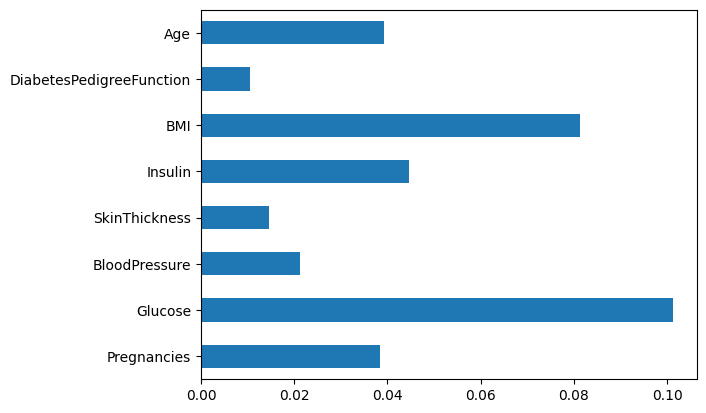

Execution time: 0.03 seconds


In [6]:
from sklearn.feature_selection import mutual_info_classif

# start time
start_time_forward = time.time()

### Applying feature selection method
X_new = mutual_info_classif(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# plot feature selection
feat_imp = pd.Series(X_new, df.columns[0:len(df.columns)-1])
feat_imp.plot(kind='barh')
plt.show()

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

### Low variance

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by: Var[X] = p(1-p), so we can select using the threshold .8 * (1 - .8), or other...

In [7]:
from sklearn.feature_selection import VarianceThreshold

# start time
start_time_forward = time.time()

### Applying feature selection method
sel = VarianceThreshold(threshold=0.16)
sel.fit_transform(X)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = sel.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
Execution time: 0.01 seconds


### Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the k highest scoring features
- SelectPercentile removes all but a user-specified highest scoring percentage of features
- using common univariate statistical tests for each feature: false positive rate SelectFpr, false discovery rate SelectFdr, or family wise error SelectFwe.
- GenericUnivariateSelect allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

For instance, we can use a F-test to retrieve the two best features for a dataset as follows:

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif

# start time
start_time_forward = time.time()

### Applying feature selection method
select_kbest = SelectKBest(score_func=f_classif, k=5)  # change k
select_kbest.fit_transform(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = select_kbest.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Execution time: 0.01 seconds


### Chi2

Compute chi-squared stats between each non-negative feature and class.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [9]:
from sklearn.feature_selection import SelectKBest, chi2

# start time
start_time_forward = time.time()

### Applying feature selection method
chi2_selector = SelectKBest(score_func=chi2, k=5)  # change k
chi2_selector.fit_transform(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = chi2_selector.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']
Execution time: 0.01 seconds


### Correlation coefficient

Correlation is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information. We will use the Pearson Correlation here.

<AxesSubplot:>

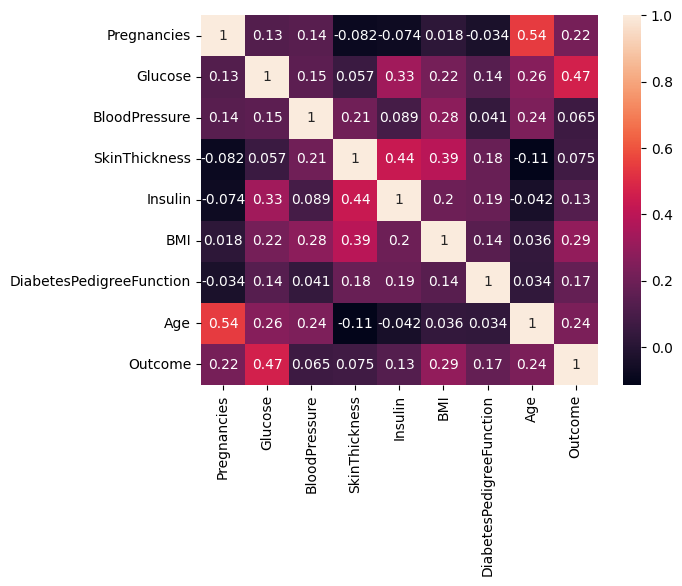

In [10]:
cor = df2.corr()
sns.heatmap(cor, annot = True)

In [11]:
# start time
start_time_forward = time.time()

### Applying feature selection method
correlation_matrix = df2.corr()
corr_with_target = correlation_matrix["Outcome"].drop("Outcome")

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# Sort and show features by absolute correlation value
sorted_corr = corr_with_target.abs().sort_values(ascending=False)
print(f"Absolute Correlations with the Objective (Outcome):\n{sorted_corr}")

# Define a threshold for correlation (e.g., keep features with |correlation| > 0.2)
threshold = 0.2
selected_features_corr = sorted_corr[sorted_corr > threshold].index.tolist()
print(f"Selected features are: {selected_features_corr}")

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

Absolute Correlations with the Objective (Outcome):
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64
Selected features are: ['Glucose', 'BMI', 'Age', 'Pregnancies']
Execution time: 0.00 seconds


## Wrapper methods

https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/

Install libraries via terminal:

In [12]:
#pip install mlxtend 

### Forward selection

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d. The motivation behind feature selection algorithms is to automatically select a subset of features most relevant to the problem. The goal of feature selection is two-fold: We want to improve the computational efficiency and reduce the model's generalization error by removing irrelevant features or noise. 

This is an iterative method wherein we start with the performing features against the target features. Next, we select another variable that gives the best performance in combination with the first selected variable. This process continues until the preset criterion is achieved.

In [13]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
# start time
start_time_forward = time.time()

### Applying feature selection method
ffs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='forward')
ffs.fit(X, y2)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = ffs.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
Execution time: 0.23 seconds


### Backward elimination

This method works exactly opposite to the Forward Feature Selection method. Here, we start with all the features available and build a model. Next, we the variable from the model, which gives the best evaluation measure value. This process is continued until the preset criterion is achieved.

In [15]:
# start time
start_time_forward = time.time()

### Applying feature selection method
bfs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='backward')
bfs.fit(X, y2)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = bfs.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
Execution time: 0.25 seconds


### Exhaustive feature selection

This exhaustive feature selection algorithm is a wrapper approach for brute-force evaluation of feature subsets; the best subset is selected by optimizing a specified performance metric given an arbitrary regressor or classifier. 

In [16]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier

# start time
start_time_forward = time.time()

### Applying feature selection method
efs = ExhaustiveFeatureSelector(RandomForestClassifier(), min_features=1, max_features=4) #change max_features
efs = efs.fit(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
print('The selected features are:', efs.best_feature_names_)

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

Features: 162/162

The selected features are: ('Pregnancies', 'Glucose', 'BMI', 'Age')
Execution time: 116.85 seconds


## Embedded methods

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection

### LASSO regularization (L1)

Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e., to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each predictor. From the different types of regularization, Lasso or L1 has the property that can shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

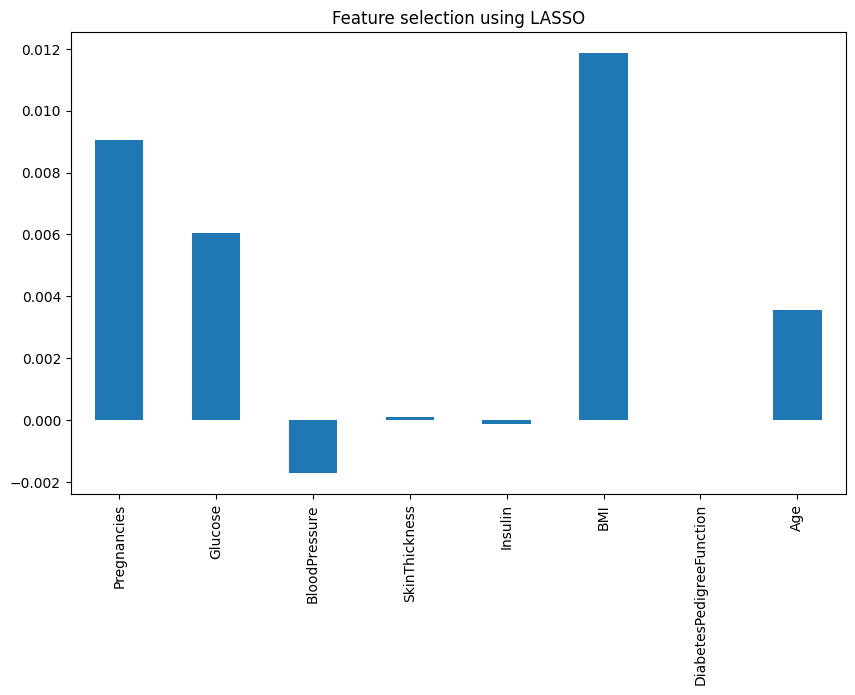

Execution time: 0.00 seconds


In [18]:
from sklearn.linear_model import Lasso

# start time
start_time_forward = time.time()

### Applying feature selection method
lasso = Lasso(alpha=0.1)  # adjust alpha
lasso.fit(X, y2)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

plt.figure(figsize=(10, 6))
lasso_coef.plot(kind='bar')
plt.title('Feature selection using LASSO')
plt.show()

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

### Random Forest Importance

Random Forests is a kind of Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words, a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of the trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# start time
start_time_forward = time.time()

### Applying feature selection method
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# show feature selection
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10, 6))
forest_importances.plot(kind='bar')
plt.title('Feature selection using Random Forest')
plt.show()

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")